# Quick Convergence Check of Gromacs Runs

In [1]:
import os
import sys
# either important by path:
sys.path.append('/home/tmaterzok/quick_gmx_edr_check/quick_gmx_edr_check/')
from gmx_energy import GMXEnergy
# or importing after pip installation:
#from quick_gmx_edr_check import GMXEnergy

import pandas as pd
import matplotlib.pyplot as plt

HOME = "/home/tmaterzok/"
os.chdir(HOME + "role_of_seq/")


In [2]:
version = GMXEnergy("")
version.__version__

'1.2.3'

In [26]:
! ls

enlarge.mdp				   lseq_test_70_70_70_dens12_sample_3
enlarge_slow.mdp			   lseq_test_70_70_70_dens12_sample_4
err.304963				   mdp_nvt_cooldown.mdp
err.304966				   minim_first.mdp
err.305045				   minim.mdp
err.305084				   minim_w_insert.mdp
err.307844				   nvt_hot.mdp
err.307977				   out.304963
err.307978				   out.304966
err.308023				   out.305045
err.308066				   out.305084
jupyter_check_system_convergences.ipynb    out.307844
jupyter_create_equilibrated_systems.ipynb  out.307977
lseq_0_sample_1				   out.307978
lseq_0_sample_2				   out.308023
lseq_0_sample_3				   out.308066
lseq_0_sample_4				   relax_angles_2.mdp
lseq_test_70_70_70_dens12_sample_1	   relax_angles_3_strong_w.mdp
lseq_test_70_70_70_dens12_sample_2


# GMXEnergy Object Initialization
First we want to plot the potential energy and angle energy for all trajectories

In [4]:
# base_dir is the root directory to start scanning for .edr files.
# load_modules is a shell command to load necessary modules for GROMACS.
# discard_perc is a percentage of the trajectory to be discarded.
gmx = GMXEnergy(
    base_dir="lseq_0_sample_2",
    load_modules="module purge && module load intel/env/2018 fftw/intel/single/sse/3.3.8 gromacs/nompi/cpu/intel/single/2018.4 &&",
    discard_perc=0.05)
gmx.scan_edr_files()
print(gmx.edr_files)
#gmx.run_gmx_energy(terms=["Potential", "G96Angle"])
#gmx.plot_energy(temp_discard_perc=0.05)

['lseq_0_sample_2/GA9rnd_gromos_em.edr', 'lseq_0_sample_2/GA9rnd_gromos_em_first.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_700/run_nvt_cooldown_700_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_600/run_nvt_cooldown_600_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1250/run_nvt_cooldown_1250_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1050/run_nvt_cooldown_1050_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_850/run_nvt_cooldown_850_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_400/run_nvt_cooldown_400_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_500/run_nvt_cooldown_500_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_950/run_nvt_cooldown_950_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1150/run_nvt_cooldown_1150_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_350/run_nvt_cooldown_350_NPT.edr', 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1300/run_nvt_cooldown_1300_NPT.edr', 'ls

With these 4 lines we can quickly check if our simulations converge in energies.

# Next we want to combine all data for the systems without water into a dataframe with increasing time

In [5]:
gmx = GMXEnergy(
    base_dir="lseq_0_sample_2",
    load_modules="module purge && module load intel/env/2018 fftw/intel/single/sse/3.3.8 gromacs/nompi/cpu/intel/single/2018.4 &&",
    discard_perc=0.05)

# Scanning for EDR Files

In [6]:
# Scan the base directory for .edr files.
gmx.scan_edr_files()
# Sort the files by their last modification time to ensure chronological order.
gmx.sort_files_by_mtime()
# Print the sorted file paths to confirm the order.
gmx.edr_files

['lseq_0_sample_2/GA9rnd_gromos_em_first.edr',
 'lseq_0_sample_2/GA9rnd_gromos_em.edr',
 'lseq_0_sample_2/nvt_hot/GA9rnd_gromos_hot.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1300/run_nvt_cooldown_1300_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1250/run_nvt_cooldown_1250_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1200/run_nvt_cooldown_1200_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1150/run_nvt_cooldown_1150_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1100/run_nvt_cooldown_1100_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1050/run_nvt_cooldown_1050_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1000/run_nvt_cooldown_1000_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_950/run_nvt_cooldown_950_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_900/run_nvt_cooldown_900_NPT.edr',
 'lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_850/run_nvt_cooldown_850_NPT.edr',
 'lseq_0_sample_2/

# Extracting Energy Data

In [7]:
# Extract the energy term "Potential" from each .edr file.
gmx.extract_data(terms=["Potential", "G96Angle"])

In [8]:
# Load all energy data into a DataFrame.
merged_data = gmx.get_data()

In [9]:
merged_data

term,Time (ps),file,G96Angle (kJ/mol),Potential (kJ/mol)
order,,,,
0,0.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41457.230469,36363.359375
1,2.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41572.828125,36047.585938
2,3.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41630.792969,35972.578125
3,4.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41693.113281,35946.996094
4,6.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41689.812500,35679.921875
...,...,...,...,...
416646,82488.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36449.285156,-183938.000000
416647,82490.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36512.617188,-182408.609375
416648,82492.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36323.980469,-183589.890625


# Parsing the details from file paths
Next, we parse details from the file paths, including water content, water strain and strain number. These details will be used to filter the simulations we are interested in.

In [10]:
# Define patterns for extracting additional information from the file paths.
patterns = {
    'sequence': 'lseq_{float_no_decimal}',
    'sample': 'sample_{float_no_decimal}',
    'water': 'w_{decimal}',
    'water_strain': 'stressstrain_{decimal}',
    'strain_num': 'run_strain_{float_no_decimal}',
    'strain_nemd': 'run_strain.{string}'
}
# Apply the patterns to the file paths and add the extracted information to the DataFrame.
merged_data_labels = gmx.extract_info_from_data(merged_data, patterns)


In [11]:
merged_data_labels

,Time (ps),file,G96Angle (kJ/mol),Potential (kJ/mol),sequence,sample,water,water_strain,strain_num,strain_nemd
order,,,,,,,,,,
0,0.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41457.230469,36363.359375,0.0,2.0,NaN,NaN,NaN,NaN
1,2.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41572.828125,36047.585938,0.0,2.0,NaN,NaN,NaN,NaN
2,3.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41630.792969,35972.578125,0.0,2.0,NaN,NaN,NaN,NaN
3,4.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41693.113281,35946.996094,0.0,2.0,NaN,NaN,NaN,NaN
4,6.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41689.812500,35679.921875,0.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
416646,82488.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36449.285156,-183938.000000,0.0,2.0,NaN,0.1,NaN,edr
416647,82490.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36512.617188,-182408.609375,0.0,2.0,NaN,0.1,NaN,edr
416648,82492.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,36323.980469,-183589.890625,0.0,2.0,NaN,0.1,NaN,edr


# Filtering and Shifting Time Data
We filter the simulations based on the water content and strain number

In [12]:
# Define conditions
condition1 = merged_data_labels['sequence'].notna() 
condition2 = merged_data_labels['sample'].notna()
condition3 = (merged_data_labels['water'].isna()) | (merged_data_labels['water'] == 0.0) 
condition4 = (merged_data_labels['water_strain'].isna()) | (merged_data_labels['water_strain'] == 0.0)
condition5 = (merged_data_labels['strain_num'].isna()) | (merged_data_labels['strain_num'] == 1.0)
condition6 = merged_data_labels['strain_nemd'].isna()

# Combine conditions
all_conditions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6

# Apply filter
filtered_data = merged_data_labels[all_conditions]

# Apply cumulative time shift to the data.
filtered_data_shift = gmx.cumulative_time_shift(filtered_data)

/home/tmaterzok/quick_gmx_edr_check/quick_gmx_edr_check/gmx_energy.py:464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cum. Time (ps)'] = data.groupby(group_column, sort=False)[time_column].transform(lambda x: x + cumulative_time_shift[x.name])


# Selecting and Plotting the Simulations of Interest
Finally, we filter the simulations based on the water content and strain number, and plot the potential energy for the selected simulations.

In [13]:
filtered_data_shift

,Time (ps),file,G96Angle (kJ/mol),Potential (kJ/mol),sequence,sample,water,water_strain,strain_num,strain_nemd,Cum. Time (ps)
order,,,,,,,,,,,
0,0.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41457.230469,36363.359375,0.0,2.0,NaN,NaN,NaN,NaN,0.0000
1,2.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41572.828125,36047.585938,0.0,2.0,NaN,NaN,NaN,NaN,2.0000
2,3.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41630.792969,35972.578125,0.0,2.0,NaN,NaN,NaN,NaN,3.0000
3,4.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41693.113281,35946.996094,0.0,2.0,NaN,NaN,NaN,NaN,4.0000
4,6.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41689.812500,35679.921875,0.0,2.0,NaN,NaN,NaN,NaN,6.0000
...,...,...,...,...,...,...,...,...,...,...,...
191632,99992.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37501.121094,-119610.750000,0.0,2.0,NaN,0.0,1.0,NaN,242906.9992
191633,99994.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37600.191406,-119127.390625,0.0,2.0,NaN,0.0,1.0,NaN,242908.9992
191634,99996.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37026.667969,-119449.570312,0.0,2.0,NaN,0.0,1.0,NaN,242910.9992


lseq_0_sample_2/GA9rnd_gromos_em_first.edr
lseq_0_sample_2/GA9rnd_gromos_em.edr
lseq_0_sample_2/nvt_hot/GA9rnd_gromos_hot.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1300/run_nvt_cooldown_1300_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1250/run_nvt_cooldown_1250_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1200/run_nvt_cooldown_1200_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1150/run_nvt_cooldown_1150_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1100/run_nvt_cooldown_1100_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1050/run_nvt_cooldown_1050_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_1000/run_nvt_cooldown_1000_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_950/run_nvt_cooldown_950_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_900/run_nvt_cooldown_900_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_850/run_nvt_cooldown_850_NPT.edr
lseq_0_sample_2/nvt_cooldown_NPT/nvt_cooldown_800/run_nvt_cooldown_800

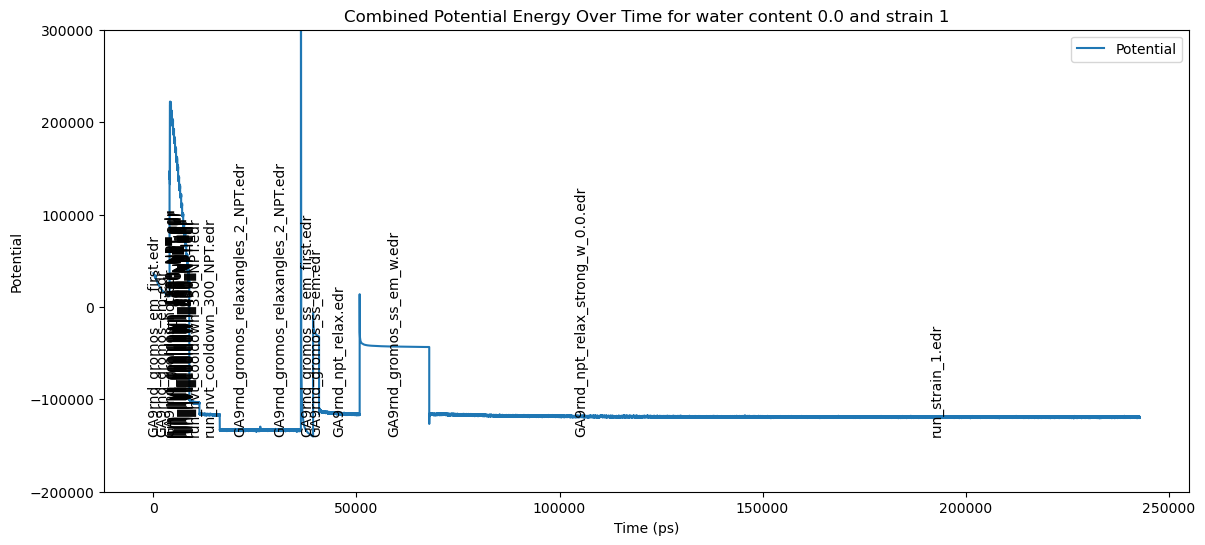

In [14]:
# Plot the potential energy for the selected simulations
plt.figure(figsize=(14, 6))
plt.plot(filtered_data_shift["Cum. Time (ps)"], filtered_data_shift["Potential (kJ/mol)"], label="Potential")
plt.xlabel("Time (ps)")
plt.ylabel("Potential")
#plt.xlim(0,15000)
plt.ylim(-2e5,3e5)
plt.legend()
for file, group in filtered_data_shift.groupby('file', sort=False):
    print(file)
    # Calculate the middle time point for this group
    mid_time = (group['Cum. Time (ps)'].min() + group['Cum. Time (ps)'].max()) / 2
    # Use the filename as the annotation text
    annotation_text = os.path.basename(file)
    plt.annotate(annotation_text, (mid_time, filtered_data_shift["Potential (kJ/mol)"].min()), rotation=90, verticalalignment='bottom', horizontalalignment='center')

plt.title("Combined Potential Energy Over Time for water content 0.0 and strain 1")
plt.show()

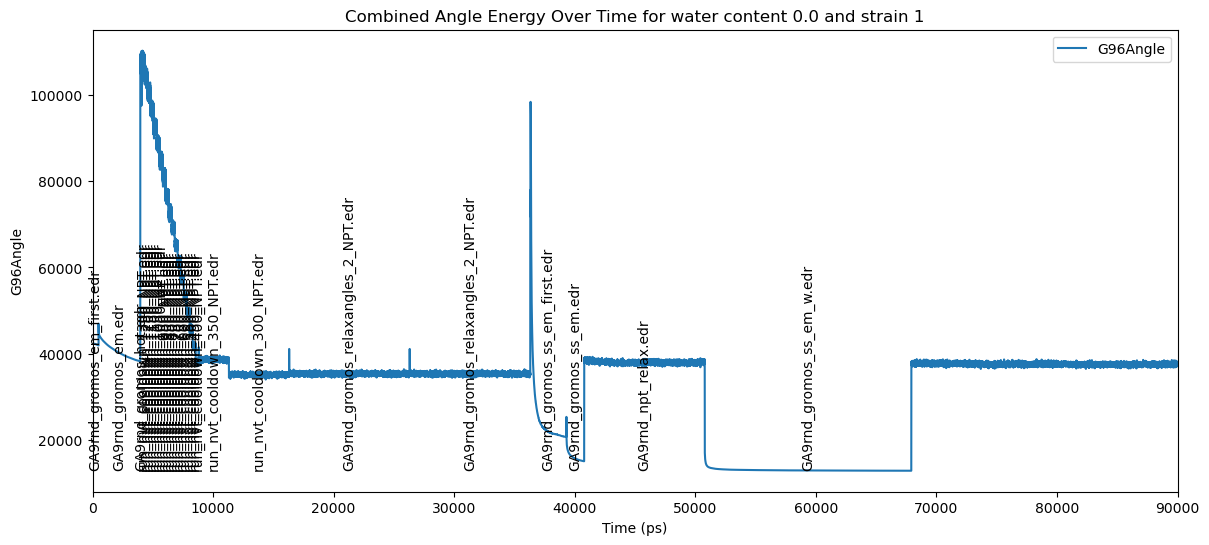

In [15]:
# Plot the potential energy for the selected simulations
plt.figure(figsize=(14, 6))
plt.plot(filtered_data_shift["Cum. Time (ps)"], filtered_data_shift["G96Angle (kJ/mol)"], label="G96Angle")
plt.xlabel("Time (ps)")
plt.ylabel("G96Angle")
plt.xlim(0,90000)
plt.legend()
for file, group in filtered_data_shift.groupby('file', sort=False):
    # Calculate the middle time point for this group
    mid_time = (group['Cum. Time (ps)'].min() + group['Cum. Time (ps)'].max()) / 2
    # Use the filename as the annotation text
    annotation_text = os.path.basename(file)
    plt.annotate(annotation_text, (mid_time, filtered_data_shift["G96Angle (kJ/mol)"].min()), rotation=90, verticalalignment='bottom', horizontalalignment='center')

plt.title("Combined Angle Energy Over Time for water content 0.0 and strain 1")
plt.show()

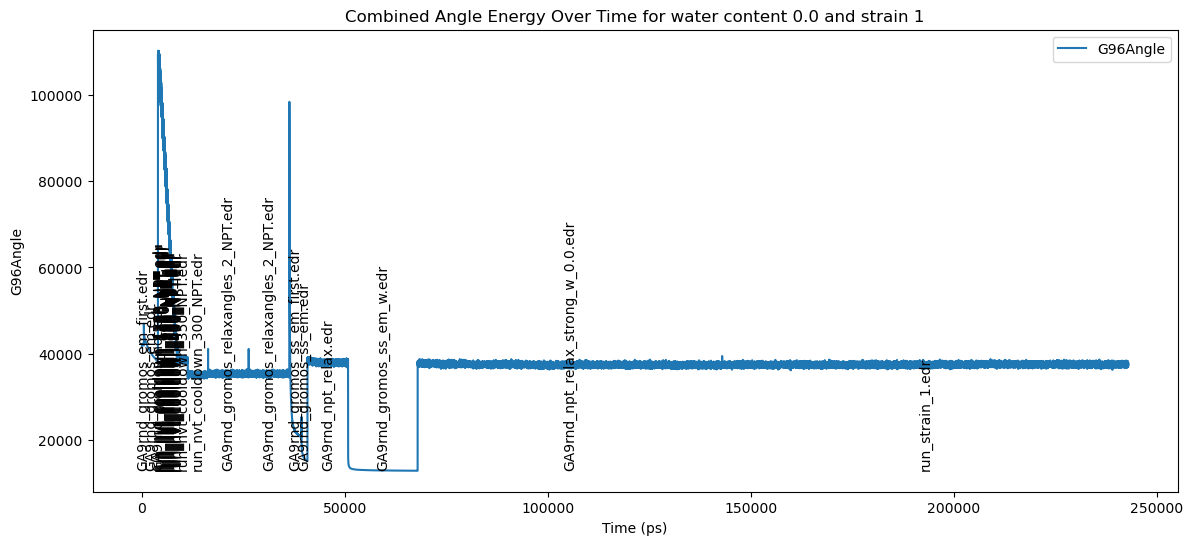

In [16]:
# Plot the potential energy for the selected simulations
plt.figure(figsize=(14, 6))
plt.plot(filtered_data_shift["Cum. Time (ps)"], filtered_data_shift["G96Angle (kJ/mol)"], label="G96Angle")
plt.xlabel("Time (ps)")
plt.ylabel("G96Angle")
plt.legend()
for file, group in filtered_data_shift.groupby('file', sort=False):
    # Calculate the middle time point for this group
    mid_time = (group['Cum. Time (ps)'].min() + group['Cum. Time (ps)'].max()) / 2
    # Use the filename as the annotation text
    annotation_text = os.path.basename(file)
    plt.annotate(annotation_text, (mid_time, filtered_data_shift["G96Angle (kJ/mol)"].min()), rotation=90, verticalalignment='bottom', horizontalalignment='center')

plt.title("Combined Angle Energy Over Time for water content 0.0 and strain 1")
plt.show()

In [17]:
filtered_data_shift

,Time (ps),file,G96Angle (kJ/mol),Potential (kJ/mol),sequence,sample,water,water_strain,strain_num,strain_nemd,Cum. Time (ps)
order,,,,,,,,,,,
0,0.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41457.230469,36363.359375,0.0,2.0,NaN,NaN,NaN,NaN,0.0000
1,2.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41572.828125,36047.585938,0.0,2.0,NaN,NaN,NaN,NaN,2.0000
2,3.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41630.792969,35972.578125,0.0,2.0,NaN,NaN,NaN,NaN,3.0000
3,4.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41693.113281,35946.996094,0.0,2.0,NaN,NaN,NaN,NaN,4.0000
4,6.0,lseq_0_sample_2/GA9rnd_gromos_em_first.edr,41689.812500,35679.921875,0.0,2.0,NaN,NaN,NaN,NaN,6.0000
...,...,...,...,...,...,...,...,...,...,...,...
191632,99992.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37501.121094,-119610.750000,0.0,2.0,NaN,0.0,1.0,NaN,242906.9992
191633,99994.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37600.191406,-119127.390625,0.0,2.0,NaN,0.0,1.0,NaN,242908.9992
191634,99996.0,lseq_0_sample_2/ss_0.33/npt_relax_water_NPT/st...,37026.667969,-119449.570312,0.0,2.0,NaN,0.0,1.0,NaN,242910.9992
